In [147]:
# Read in the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import joblib

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read in the dataset
df = pd.read_excel("Desktop/short-format.xlsx", header = 3)

In [6]:
# Set max column display limit to none
pd.set_option('display.max_columns', None)

In [7]:
df.head(6)

,Country ISO-3 Code,Country Short Name,Year period,Median Year,Start Month,End Month,WHO Reference number,Representation level,Region,Other group/Zone,Age,Sex,Mother education,Wealth quintile,Urban/Rural,Sample size,Severe wasting,Wasting,Overweight,Stunting,Underweight,Short Source Code,Reference Title,Author,Notes,JME (Y/N)
0,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,0. - 4.99,BTSX,NaN,NaN,BOTH,32303.0,1.20261,3.63299,4.50092,44.60430,18.35824,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Selected for JME
1,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,0. - 0.49,BTSX,NaN,NaN,BOTH,3178.0,2.52439,6.25841,14.13189,26.19436,14.19366,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME
2,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,0.50 - 0.99,BTSX,NaN,NaN,BOTH,3123.0,1.97696,6.63969,4.74012,24.18722,14.68663,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME
3,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,1. - 1.99,BTSX,NaN,NaN,BOTH,6072.0,1.33964,4.81251,3.29225,41.13941,17.18858,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME
4,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,2. - 2.99,BTSX,NaN,NaN,BOTH,6230.0,0.94883,2.98044,3.45675,54.68480,21.04723,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME
5,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,3. - 3.99,BTSX,NaN,NaN,BOTH,6738.0,0.70962,1.92516,3.83220,54.23912,20.22084,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME


In [8]:
# To see the shape:
df.shape

(40631, 26)

In [9]:
# To cheeck genral info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40631 entries, 0 to 40630
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country ISO-3 Code    40631 non-null  object 
 1   Country Short Name    40631 non-null  object 
 2   Year period           40631 non-null  object 
 3   Median Year           40631 non-null  int64  
 4   Start Month           38562 non-null  object 
 5   End Month             38497 non-null  object 
 6   WHO Reference number  40631 non-null  int64  
 7   Representation level  1618 non-null   object 
 8   Region                10667 non-null  object 
 9   Other group/Zone      31 non-null     object 
 10  Age                   40631 non-null  object 
 11  Sex                   40631 non-null  object 
 12  Mother education      1353 non-null   object 
 13  Wealth quintile       3269 non-null   object 
 14  Urban/Rural           40631 non-null  object 
 15  Sample size        

In [10]:
# To check for missing values in absolute terms in the dataset
missing = df.isnull().sum()
missing = missing[missing > 0]
missing

Start Month              2069
End Month                2134
Representation level    39013
Region                  29964
Other group/Zone        40600
Mother education        39278
Wealth quintile         37362
Sample size              4902
Severe wasting           2013
Wasting                  1438
Overweight               2015
Stunting                 1372
Underweight               993
Notes                   25243
dtype: int64

In [11]:
# To check for duplicates
df.duplicated().sum()

0

In [12]:
# To display the missing values in the dataset by percentages in the order of highest to lowest
pd.DataFrame(data = {"% of Missing Values": round(df.isnull().sum()/df.isnull().count()*100,2)}).sort_values(by = "% of Missing Values", ascending = False)

,% of Missing Values
Other group/Zone,99.92
Mother education,96.67
Representation level,96.02
Wealth quintile,91.95
Region,73.75
Notes,62.13
Sample size,12.06
End Month,5.25
Start Month,5.09
Overweight,4.96


In [13]:
# Obtain categorical features
df.select_dtypes(include='object').columns

Index(['Country ISO-3 Code', 'Country Short Name', 'Year period',
       'Start Month', 'End Month', 'Representation level', 'Region',
       'Other group/Zone', 'Age', 'Sex', 'Mother education', 'Wealth quintile',
       'Urban/Rural', 'Short Source Code', 'Reference Title', 'Author',
       'Notes', 'JME (Y/N)'],
      dtype='object')

In [14]:
# Obtain numeric features
df.select_dtypes(include='number').columns

Index(['Median Year', 'WHO Reference number', 'Sample size', 'Severe wasting',
       'Wasting', 'Overweight', 'Stunting', 'Underweight'],
      dtype='object')

In [15]:
# To get the number of unique values in each column
for col in df.columns:
    values = df[col].nunique()
    print(f'{col}:{values}')

Country ISO-3 Code:169
Country Short Name:169
Year period:136
Median Year:57
Start Month:25
End Month:12
WHO Reference number:1258
Representation level:6
Region:2749
Other group/Zone:4
Age:40
Sex:3
Mother education:3
Wealth quintile:7
Urban/Rural:3
Sample size:6167
Severe wasting:29966
Wasting:33156
Overweight:33393
Stunting:34874
Underweight:34476
Short Source Code:21
Reference Title:1239
Author:928
Notes:238
JME (Y/N):2


In [16]:
# Capitalise the column headers
df.columns = df.columns.str.upper()

In [17]:
def wrangle(data):
    # Drop rows where both start month and end month are null
    data.dropna(subset=['START MONTH', 'END MONTH'], how='all', inplace=True)

    # Drop irrelevant columns
    data.drop(columns = ['OTHER GROUP/ZONE', 'MOTHER EDUCATION', 'REPRESENTATION LEVEL', 'WEALTH QUINTILE', 'COUNTRY ISO-3 CODE', 'WHO REFERENCE NUMBER', 'REFERENCE TITLE', 'YEAR PERIOD', 'REGION', 'NOTES', 'SHORT SOURCE CODE', 'AUTHOR'], axis = 1, inplace = True)

    # Rename country short name
    data.rename(columns = {'COUNTRY SHORT NAME':'COUNTRY'}, inplace = True)

    # Map the months correctly
    month_mapping = {
        'JUNE': 'JUN',
        'JULY': 'JUL',
        'AUGUST': 'AUG',
        'SEPTEMBER': 'SEP',
        'OCTOBER': 'OCT',
        'NOVEMBER': 'NOV',
        'DECEMBER': 'DEC',
        'JANUARY': 'JAN',
        'FEBRUARY': 'FEB',
        'MARCH': 'MAR',
        'APRIL': 'APR',
        'JULN': 'JUL',
        'NMAR': 'MAR'
    }

    # Replace alternative month representations with standard abbreviations
    data['START MONTH'].replace(month_mapping, inplace=True)
    data['END MONTH'].replace(month_mapping, inplace=True)

    # Replace remaining null values with the most common month
    mode_month = df['END MONTH'].value_counts(dropna=False).index[0]
    data['END MONTH'].fillna(mode_month, inplace=True)

    # Fill null values in the columns with mean
    cols = ['SAMPLE SIZE', 'SEVERE WASTING', 'WASTING', 'OVERWEIGHT', 'STUNTING', 'UNDERWEIGHT']
    for col in cols:
      data[col].fillna(data[col].median(), inplace=True)

    # Replace target variable with 1 and 0
    data['JME (Y/N)'] = data['JME (Y/N)'].replace({
        'Selected for JME': 1,
        'Not selected for JME': 0
    })

    return data

In [18]:
df = wrangle(df)

In [19]:
# Having resolved the missing values, lets ensure there are no missing values in the dataset:
df.isnull().sum()

COUNTRY           0
MEDIAN YEAR       0
START MONTH       0
END MONTH         0
AGE               0
SEX               0
URBAN/RURAL       0
SAMPLE SIZE       0
SEVERE WASTING    0
WASTING           0
OVERWEIGHT        0
STUNTING          0
UNDERWEIGHT       0
JME (Y/N)         0
dtype: int64

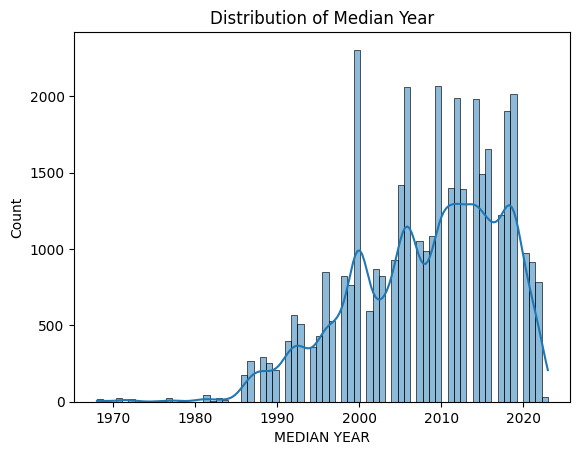

In [20]:
sns.histplot(data=df, x='MEDIAN YEAR', kde=True)
plt.title('Distribution of Median Year')
plt.show()

In [21]:
num_features = ['SAMPLE SIZE', 'SEVERE WASTING', 'WASTING', 'OVERWEIGHT', 'STUNTING', 'UNDERWEIGHT']

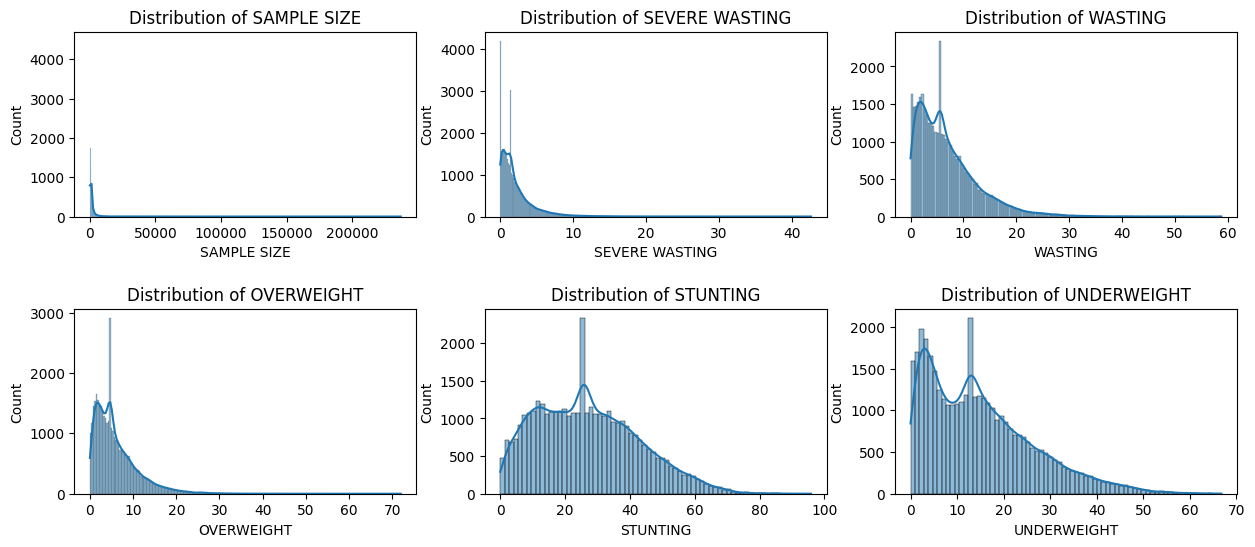

In [22]:
num_rows, num_cols = 2, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6), gridspec_kw={'hspace': 0.5})

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = [axes]

for i, col in enumerate(num_features):
  ax = axes[i // num_cols][i % num_cols]
  sns.histplot(data=df, x=col, kde=True, ax=ax)
  ax.set_title(f'Distribution of {col}')

plt.show()

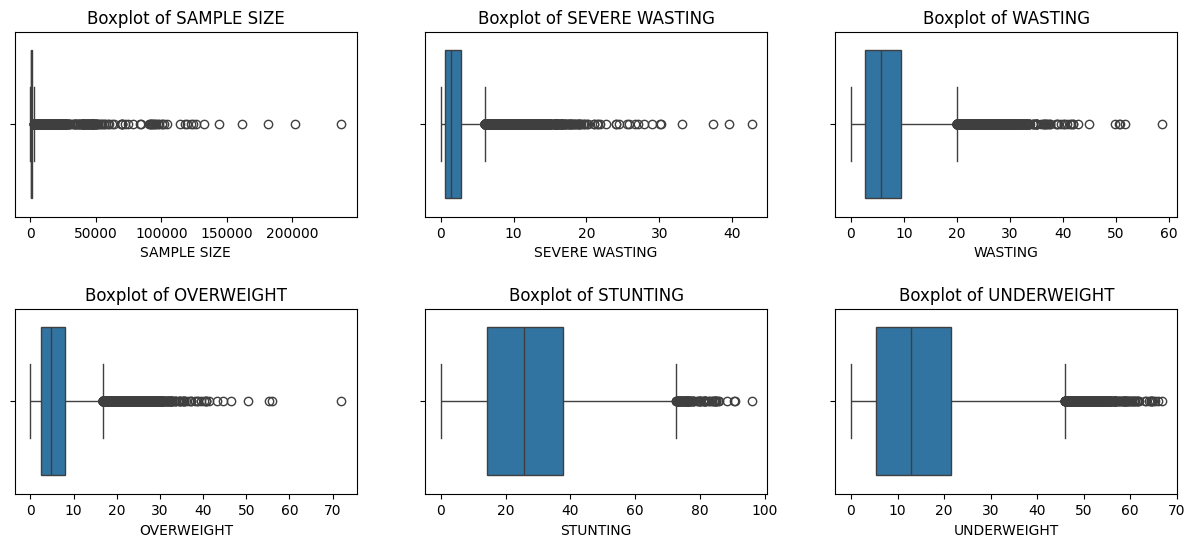

In [23]:
num_rows, num_cols = 2, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6), gridspec_kw={'hspace': 0.5})

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = [axes]

for i, col in enumerate(num_features):
  ax = axes[i // num_cols][i % num_cols]
  sns.boxplot(data=df, x=col, ax=ax)
  ax.set_title(f'Boxplot of {col}')

plt.show()

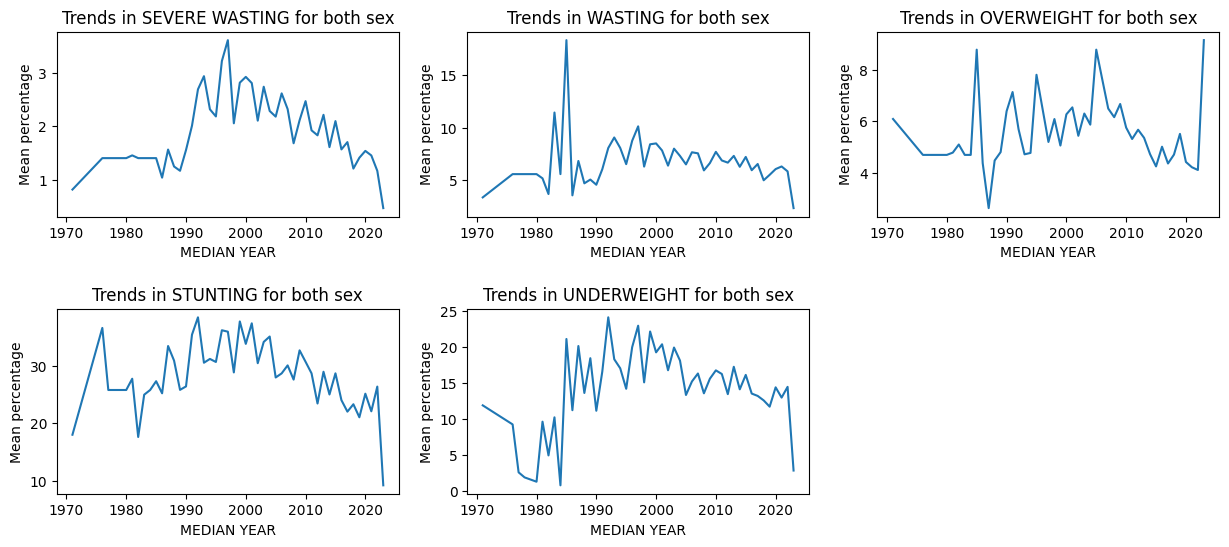

In [24]:
num_rows, num_cols = 2, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6), gridspec_kw={'hspace': 0.5})

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = [axes]

subset_df = df[(df['SEX'] == 'BTSX') & (df['AGE'] == '0.   - 4.99')]

for i, col in enumerate(num_features[1:]):
  ax = axes[i // num_cols][i % num_cols]
  subset_df.groupby('MEDIAN YEAR')[col].mean().plot(kind='line', ax=ax)
  ax.set_title(f'Trends in {col} for both sex')
  ax.set_ylabel('Mean percentage')

# Delete the last subplot
fig.delaxes(axes[1][2])

# Show plots
plt.show()

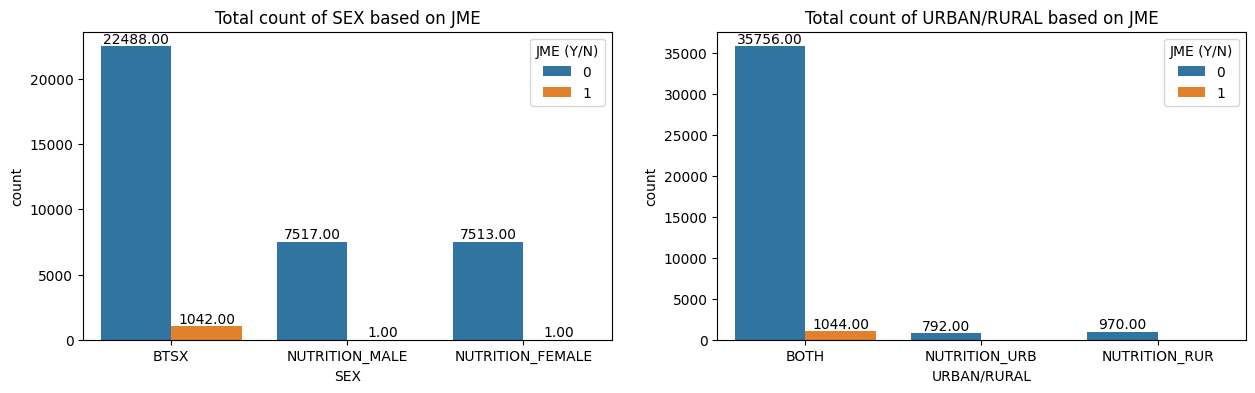

In [25]:
cols = ['SEX', 'URBAN/RURAL']
num_rows, num_cols = 1, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,4), gridspec_kw={'wspace': 0.2})

for i, col in enumerate(cols):
  sns.countplot(data=df, x=col, hue='JME (Y/N)', ax=axes[i])
  axes[i].bar_label(axes[i].containers[0], fontsize=10, fmt='%.2f')
  axes[i].bar_label(axes[i].containers[1], fontsize=10, fmt='%.2f')
  axes[i].set_title(f'Total count of {col} based on JME')

plt.show()

In [26]:
# Create a new feature for the month period
df['MONTH PERIOD'] = df['START MONTH'] + ' - ' + df['END MONTH']

In [27]:
# Move the new feature to the 7th column
df.insert(6, 'MONTH PERIOD', df.pop('MONTH PERIOD'))

In [28]:
df.groupby('MONTH PERIOD')['JME (Y/N)'].count().sort_values(ascending=False)

MONTH PERIOD
JAN - DEC    1585
SEP - DEC    1296
JUL - SEP     819
JUL - NOV     771
MAY - JUN     745
             ... 
SEP - MAY      21
MAY - MAR      20
AUG - JUL      12
DEC - OCT       7
JUN - MAR       6
Name: JME (Y/N), Length: 137, dtype: int64

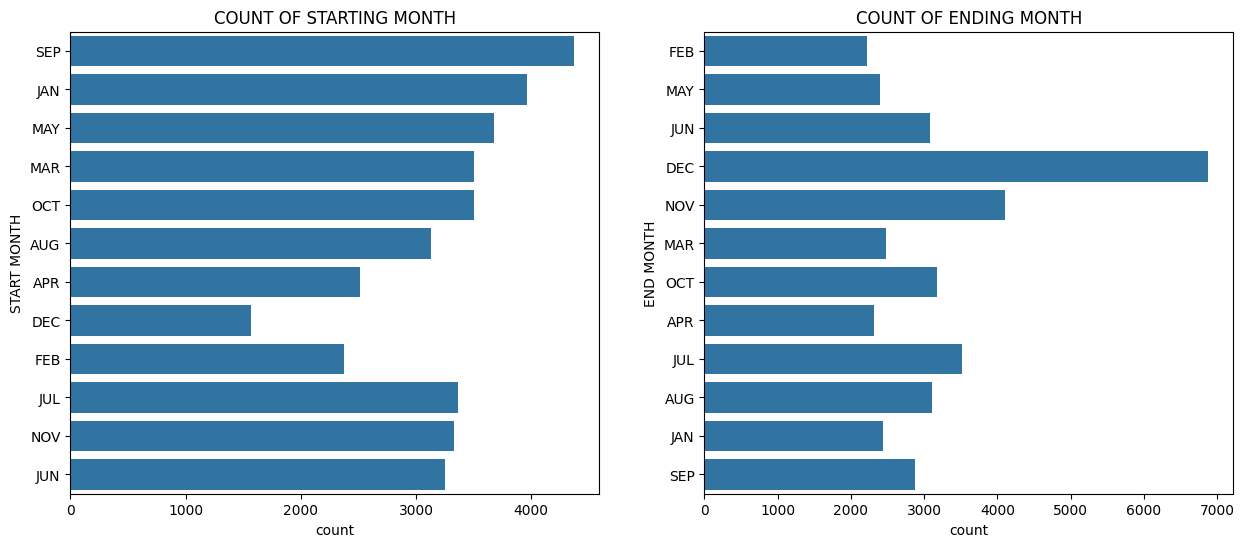

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15,6), gridspec_kw={'wspace': 0.2})
sns.countplot(data=df, y='START MONTH', ax=axes[0])
axes[0].set_title('COUNT OF STARTING MONTH')
sns.countplot(data=df, y='END MONTH', ax=axes[1])
axes[1].set_title('COUNT OF ENDING MONTH')
plt.show()

In [30]:
pd.crosstab(df['JME (Y/N)'], df['MONTH PERIOD'])

MONTH PERIOD,APR - APR,APR - AUG,APR - DEC,APR - FEB,APR - JAN,APR - JUL,APR - JUN,APR - MAR,APR - MAY,APR - NOV,APR - OCT,APR - SEP,AUG - APR,AUG - AUG,AUG - DEC,AUG - FEB,AUG - JAN,AUG - JUL,AUG - JUN,AUG - MAR,AUG - NOV,AUG - OCT,AUG - SEP,DEC - APR,DEC - AUG,DEC - DEC,DEC - FEB,DEC - JAN,DEC - JUL,DEC - JUN,DEC - MAR,DEC - MAY,DEC - OCT,FEB - APR,FEB - AUG,FEB - DEC,FEB - FEB,FEB - JAN,FEB - JUL,FEB - JUN,FEB - MAR,FEB - MAY,FEB - NOV,FEB - OCT,JAN - APR,JAN - AUG,JAN - DEC,JAN - FEB,JAN - JAN,JAN - JUL,JAN - JUN,JAN - MAR,JAN - MAY,JAN - NOV,JAN - OCT,JAN - SEP,JUL - APR,JUL - AUG,JUL - DEC,JUL - FEB,JUL - JAN,JUL - JUL,JUL - JUN,JUL - MAR,JUL - MAY,JUL - NOV,JUL - OCT,JUL - SEP,JUN - APR,JUN - AUG,JUN - DEC,JUN - FEB,JUN - JAN,JUN - JUL,JUN - JUN,JUN - MAR,JUN - MAY,JUN - NOV,JUN - OCT,JUN - SEP,MAR - APR,MAR - AUG,MAR - DEC,MAR - FEB,MAR - JAN,MAR - JUL,MAR - JUN,MAR - MAR,MAR - MAY,MAR - NOV,MAR - OCT,MAR - SEP,MAY - APR,MAY - AUG,MAY - DEC,MAY - JUL,MAY - JUN,MAY - MAR,MAY - MAY,MAY - NOV,MAY - OCT,MAY - SEP,NOV - APR,NOV - AUG,NOV - DEC,NOV - FEB,NOV - JAN,NOV - JUL,NOV - JUN,NOV - MAR,NOV - MAY,NOV - NOV,NOV - OCT,NOV - SEP,OCT - APR,OCT - DEC,OCT - FEB,OCT - JAN,OCT - JUL,OCT - JUN,OCT - MAR,OCT - MAY,OCT - NOV,OCT - OCT,OCT - SEP,SEP - APR,SEP - AUG,SEP - DEC,SEP - FEB,SEP - JAN,SEP - JUL,SEP - JUN,SEP - MAR,SEP - MAY,SEP - NOV,SEP - OCT,SEP - SEP
JME (Y/N),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,114,259,194,50,90,314,383,97,334,166,200,252,52,294,325,258,269,11,20,112,727,384,600,302,108,205,197,136,106,99,96,275,7,270,234,150,190,33,385,225,339,336,53,95,225,134,1491,269,274,157,356,292,237,44,225,114,47,284,228,85,255,285,87,78,28,754,346,799,54,484,419,93,134,601,47,6,74,582,468,204,284,326,536,55,44,544,552,177,533,221,55,93,80,606,627,678,724,19,78,108,290,375,387,102,715,392,167,196,147,469,226,264,143,43,340,485,311,559,88,269,376,196,494,167,115,100,186,1263,272,416,56,90,345,21,592,711,204
1,3,7,4,1,1,8,13,2,11,4,4,6,1,8,10,5,5,1,1,3,16,12,17,7,2,7,6,3,2,2,3,4,0,6,11,4,5,1,9,6,13,7,2,2,5,3,94,5,5,4,11,8,6,1,4,3,1,12,10,1,6,5,5,2,1,17,8,20,1,14,12,2,3,19,2,0,1,13,12,5,7,8,10,1,1,14,13,9,15,3,1,6,2,14,14,19,21,1,4,4,7,9,11,2,20,8,5,4,4,10,6,6,3,1,8,16,7,14,2,6,11,6,20,8,4,3,4,33,5,10,2,1,8,0,15,23,9


In [31]:
pd.crosstab(df['JME (Y/N)'], df['AGE'])

AGE,0. - 0.49,0. - 0.99,0. - 1.99,0. - 2.99,0. - 3.00,0. - 3.99,0. - 4.99,0. - 5.00,0. - 5.99,0.25 - 4.99,0.50 - 0.74,0.50 - 0.99,0.50 - 1.99,0.50 - 2.99,0.50 - 4.99,0.50 - 5.00,0.50 - 5.99,0.75 - 0.99,1. - 1.49,1. - 1.99,1. - 4.99,1. - 5.00,1. - 6.99,1.50 - 1.99,2. - 2.49,2. - 2.99,2. - 3.99,2. - 4.99,2. - 5.00,2.50 - 2.99,3. - 3.49,3. - 3.99,3.50 - 3.99,4. - 4.49,4. - 4.99,4. - 5.00,4. - 5.99,4.50 - 4.99
JME (Y/N),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2437,3,2320,25,3,4,16379,641,66,2,3,2558,63,1,357,41,1,3,5,2584,2,3,2,5,1,2575,10,2370,6,1,1,2526,1,1,2332,178,7,1
1,0,0,0,0,0,1,931,43,18,5,0,0,0,0,40,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Perform independent samples t-test
for col in num_features:
    group_Y = df[df['JME (Y/N)'] == 1][col]
    group_N = df[df['JME (Y/N)'] == 0][col]
    t_stat, p_value = stats.ttest_ind(group_Y, group_N)
    print(f"The p-value for {col} is: {p_value}")

The p-value for SAMPLE SIZE is: 1.433055307835553e-286
The p-value for SEVERE WASTING is: 0.00031777486494953837
The p-value for WASTING is: 0.04847356808765751
The p-value for OVERWEIGHT is: 0.8624730393962339
The p-value for STUNTING is: 0.6559993648863461
The p-value for UNDERWEIGHT is: 0.7321111577719699


In [33]:
cat_features = ['COUNTRY', 'START MONTH', 'END MONTH', 'AGE', 'SEX',  'URBAN/RURAL']

In [34]:
for col in cat_features:
    contingency_table = pd.crosstab(df[col], df['JME (Y/N)'])

    # Chi-square test
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"The p-value for {col} is:", p_val)

The p-value for COUNTRY is: 6.7575637131853966e-96
The p-value for START MONTH is: 0.030462944698846778
The p-value for END MONTH is: 0.032678423443783446
The p-value for AGE is: 1.3714947765169007e-270
The p-value for SEX is: 4.00319908005901e-148
The p-value for URBAN/RURAL is: 6.9723095981178264e-12


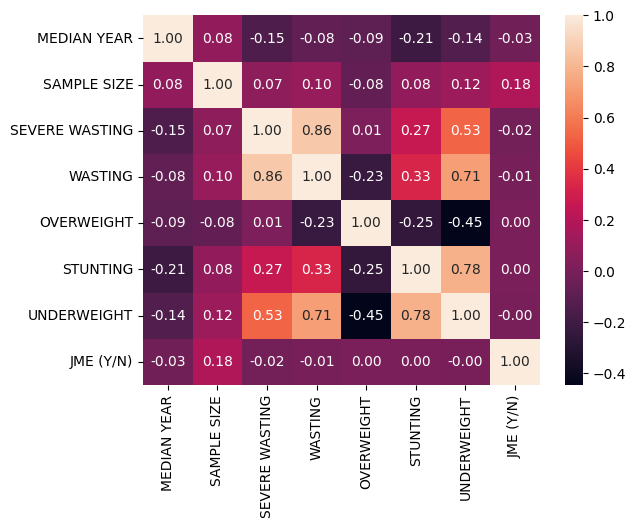

In [35]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

In [36]:
for features in num_features:
    skew = df[features].skew()
    skew = round(skew, 2)
    print(f"{features}: {skew}")

SAMPLE SIZE: 19.44
SEVERE WASTING: 2.88
WASTING: 1.44
OVERWEIGHT: 1.74
STUNTING: 0.45
UNDERWEIGHT: 0.92


## Normalization and Sampling

In [37]:
# Normalise the numerical features
df[num_features] = df[num_features].apply(np.log1p)

In [148]:
# To check operation
df.head()
features = [df.columns]

In [39]:
# Encode categorical variables
new_df = pd.get_dummies(df.drop(columns=['MONTH PERIOD']), drop_first=True, dtype=int)

In [40]:
new_df.shape

(38562, 236)

In [41]:
new_df['JME (Y/N)'].value_counts()

JME (Y/N)
0    37518
1     1044
Name: count, dtype: int64

In [42]:
# Perform undersampling
df_0 = new_df[new_df['JME (Y/N)'] == 0].sample(1500)
df_1 = new_df[new_df['JME (Y/N)'] == 1]

# Construct new df with df_0 and df_1
sampled_df = pd.concat([df_0, df_1])

In [43]:
# Shuffle the sampled_df
shuffled_df = shuffle(sampled_df).reset_index(drop=True)

In [44]:
# To separate the input and target variables
X = shuffled_df.drop('JME (Y/N)', axis = 1)
y = shuffled_df['JME (Y/N)']

In [45]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
y_train.value_counts()

JME (Y/N)
0    1126
1     782
Name: count, dtype: int64

In [47]:
# Apply SMOTE to reduce imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [48]:
y_train_balanced.value_counts(dropna=False)

JME (Y/N)
1    1126
0    1126
Name: count, dtype: int64

In [49]:
# Initialise the scaler
scaler = MinMaxScaler()

# Transform the train and test sets
train_balanced_scaled = scaler.fit_transform(X_train_balanced)
test_scaled = scaler.transform(X_test)

# Insert into dataframes
train = pd.DataFrame(train_balanced_scaled, columns=X_train.columns)
test = pd.DataFrame(test_scaled, columns=X_test.columns)

In [50]:
# Create a list of models to evaluate
models = [('RandomForest', RandomForestClassifier()),
          ('LogisticsRegression', LogisticRegression()),
          ('DecisionTree', DecisionTreeClassifier()),
          ('SupportVectorClassifier', SVC())]

In [51]:
# Next, cross validation is performed to evaluate model
results = {}
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, train, y_train_balanced, cv=kfold, scoring='accuracy')
    results[name] = cv_scores.mean()

In [52]:
results

{'RandomForest': 0.9160768662232076,
 'LogisticsRegression': 0.898310914018231,
 'DecisionTree': 0.8814338507021434,
 'SupportVectorClassifier': 0.8658950480413894}

In [53]:
# Fit the best model to the train data
model = RandomForestClassifier(random_state=42)
model.fit(train, y_train_balanced)

RandomForestClassifier(random_state=42)

In [54]:
# Predict for the test set
y_pred = model.predict(test)

In [55]:
# Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9088


In [56]:
# Classification report new
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       374
           1       0.87      0.92      0.89       262

    accuracy                           0.91       636
   macro avg       0.90      0.91      0.91       636
weighted avg       0.91      0.91      0.91       636



In [66]:
# Classification report new
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       374
           1       0.87      0.92      0.90       262

    accuracy                           0.91       636
   macro avg       0.91      0.91      0.91       636
weighted avg       0.91      0.91      0.91       636



In [58]:
# Confusion matrix new
print(confusion_matrix(y_test, y_pred))

[[337  37]
 [ 21 241]]


In [67]:
# Confusion matrix new
print(confusion_matrix(y_test, y_pred_tuned))

[[339  35]
 [ 21 241]]


In [60]:
# Define the parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the model
rf_model = RandomForestClassifier(random_state=42)

# Find the best parameters
cv_model = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [61]:
# Fit the model
cv_model.fit(train, y_train_balanced)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [62]:
# Obtain the best model
best_model = cv_model.best_estimator_

In [63]:
# Obtained prediction with tuned model
y_pred_tuned = best_model.predict(test)

In [64]:
# Check accuracy score
accuracy = accuracy_score(y_test, y_pred_tuned)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9119


In [ ]:
# Save the model to a pickle file
with open('model.pkb', 'wb') as file:
  pickle.dump(best_model, file)

In [149]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df3 = numerical_df.drop('JME (Y/N)', axis=1)
# Now we create an array that contains all the numerical columns excluding 'JME (Y/N)'
array = numerical_df3.columns
arr = []
for a in array:
    arr.append(a)
A = numerical_df2.drop('JME (Y/N)', axis=1)
b = numerical_df2['JME (Y/N)']
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['COUNTRY']),
        ('num', 'passthrough', arr)
    ]
)
# Create a pipeline with the transformer and the model
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier())
])
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=0.2, random_state=42)
# Training the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9734


In [150]:
#Using the pipeline for predictions
import joblib
import numpy as np

# Load the saved pipeline
#pipeline = joblib.load('model_pipeline.pkl')

# New input data
new_data = {
    'MEDIAN YEAR': 2022,
    'SAMPLE SIZE': 10.382946,
    'SEVERE WASTING': 0.789643,
    'WASTING': 1.533202,
    'OVERWEIGHT': 1.704915,
    'STUNTING': 3.820002,
    'UNDERWEIGHT': 2.963118,
    'COUNTRY': ['Afghanistan']
}
new_df = pd.DataFrame(new_data)

# Make predictions
predictions = pipeline.predict(new_df)
print(predictions)


[1]


In [151]:
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']